# Market Reach

Here we will discuss the concept of `reach` with respect to marketing. `Reach` can be defined as the number of unique devices/households/users that have seen an advertisement (impression). Understanding `reach` is important especially for brand campaigns where the priority is to create awareness of a product or service. Discussions also center around the concept of `frequency` as both go hand in hand. `Frequency` can be defined as how many impressions were served to the same unique device/household/user. These are discussed in tandem because for a marketing campaign if you have a set number of impressions, if one metric goes up the other will have to go down.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform

sns.set()

## Simulation

The goal is to better understand the interplay of reach and frequency given certain constraints. I'm hoping to start with something very simple and build in complexity over time. In this example we will look at the simple constraints of:
- `impressions` -> how many impressions are we serving per week
    - This is the same each week
- `publisher_capacity` -> number of unique users on a given publisher
    - Publisher -> let's use Hulu as an example; (`marketing channel`: streaming TV)
- `num_weeks` -> how many weeks we are running a campaign on a given publisher

For this example, we will assume that all viewers on the publisher watch for the same amounts of time daily and around the same time. This means that the probability of any user of Hulu to see an ad should be equal. Just keep it simple.

In [2]:
# INPUTS
impressions = 300000
publisher_capacity = 1000000
num_weeks = 10

In [3]:
def collect_weekly_viewership(impressions: int, publisher_capacity: int, num_weeks: int):
    '''Simulate ad viewership'''
    # Distribution to draw users from
    data = []

    for i in range(num_weeks):
        # Get the user distribution for impressions served
        # NOTE: essentially assigning an integer as a unique user
        weekly_viewers = np.random.randint(low=0, high=publisher_capacity, size=impressions)
        data.append(weekly_viewers)
    
    return data

viewership = collect_weekly_viewership(impressions, publisher_capacity, num_weeks)

In [4]:
from collections import Counter

def reach_frequency_distribution(data: list):
    '''Collect cumulative reach and cumulative frequency distribution'''

    reach_totals = []
    frequency_dists = []

    # Get running frequency distribution
    viewers = np.array([], dtype=int)
    for idx, weekly_viewers in enumerate(data):
        
        # Collect number of impressions each viewer saw
        viewers = np.concatenate((viewers, weekly_viewers))
        viewers_frequency = Counter(viewers)

        # Collect number of viewers hit at a specific frequency
        frequency_counts = Counter(viewers_frequency.values())
        frequency_dists.append(frequency_counts)
        
        # Calculate reach
        reach = len(viewers_frequency)
        print(f'Week {idx} Cumulative Reach: {reach}')
        reach_totals.append(reach)
    
    return reach_totals, frequency_dists

reach_totals, frequency_dists = reach_frequency_distribution(viewership)

Week 0 Cumulative Reach: 259176
Week 1 Cumulative Reach: 451007
Week 2 Cumulative Reach: 593127
Week 3 Cumulative Reach: 698651
Week 4 Cumulative Reach: 776943
Week 5 Cumulative Reach: 834761
Week 6 Cumulative Reach: 877537
Week 7 Cumulative Reach: 909269
Week 8 Cumulative Reach: 932901
Week 9 Cumulative Reach: 950414


### Plot Land

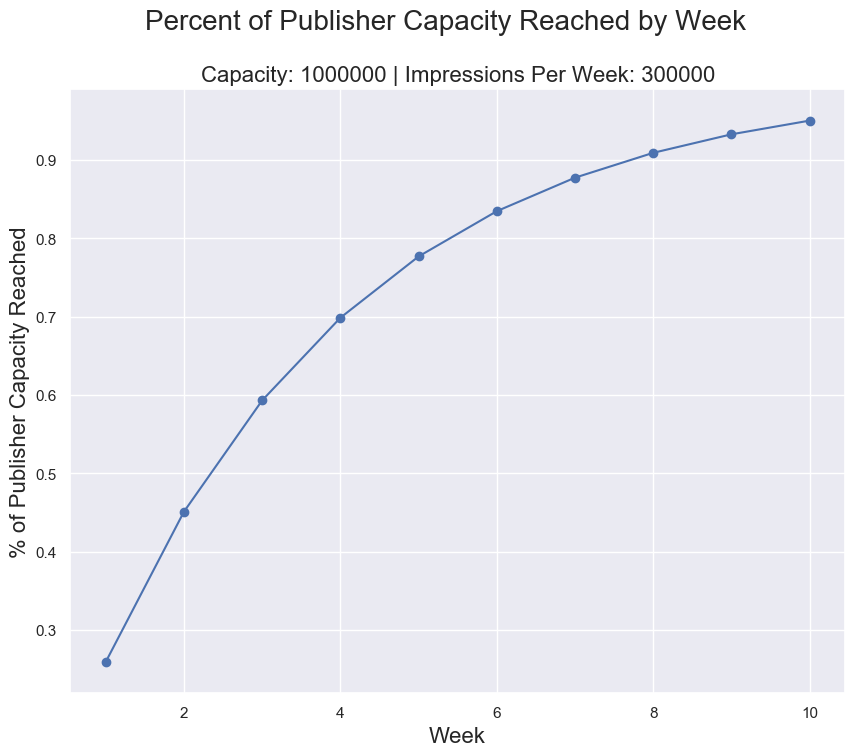

In [5]:
# Plot % of Capacity Over Time
plt.figure(figsize=(10,8), dpi=100)

capacity_pct = [reach / publisher_capacity for reach in reach_totals]
weeks = [i for i in range(1, num_weeks + 1)]

plt.scatter(weeks, capacity_pct)
plt.plot(weeks, capacity_pct)

plt.suptitle(
    'Percent of Publisher Capacity Reached by Week',
    fontsize=20
)
plt.title(
    f'Capacity: {publisher_capacity} | Impressions Per Week: {impressions}',
    fontsize=16
)
plt.xlabel('Week', fontsize=16)
plt.ylabel('% of Publisher Capacity Reached', fontsize=16)
plt.savefig(f'./images/capacity_curve.png', dpi=200, bbox_inches='tight')
plt.show()

As you can see from this experiment, it only takes 2-3 weeks to reach 50% of the publishers users, but it'll take another 5-6 weeks to reach 90% of the publishers users. Each incremental user reached costs more than the last and is an important consideration when investing in any marketing channel.

Now let's look at how our frequency distribution changes over time.

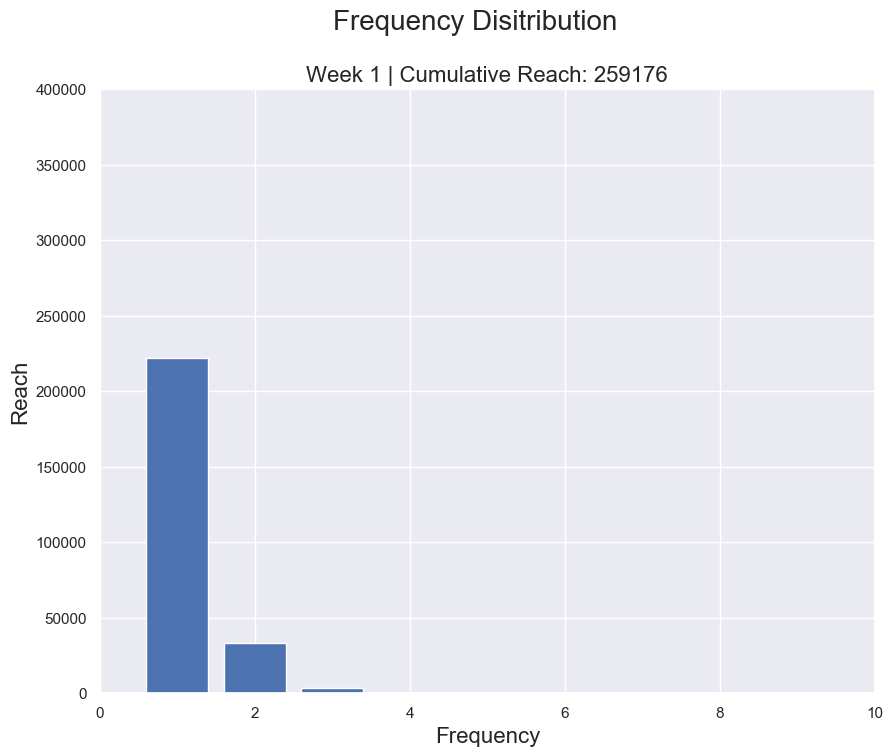

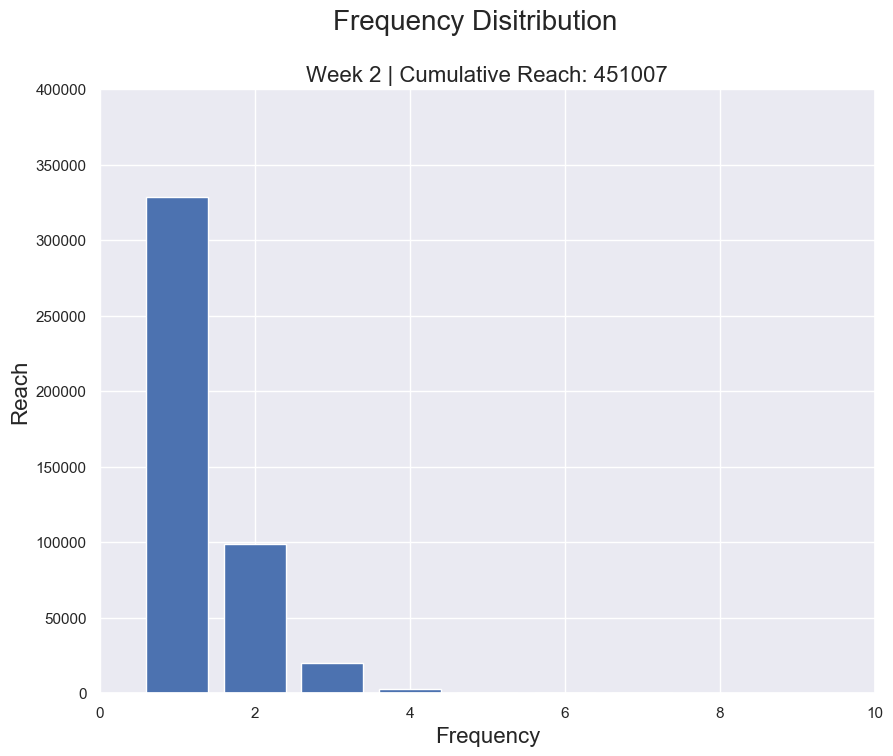

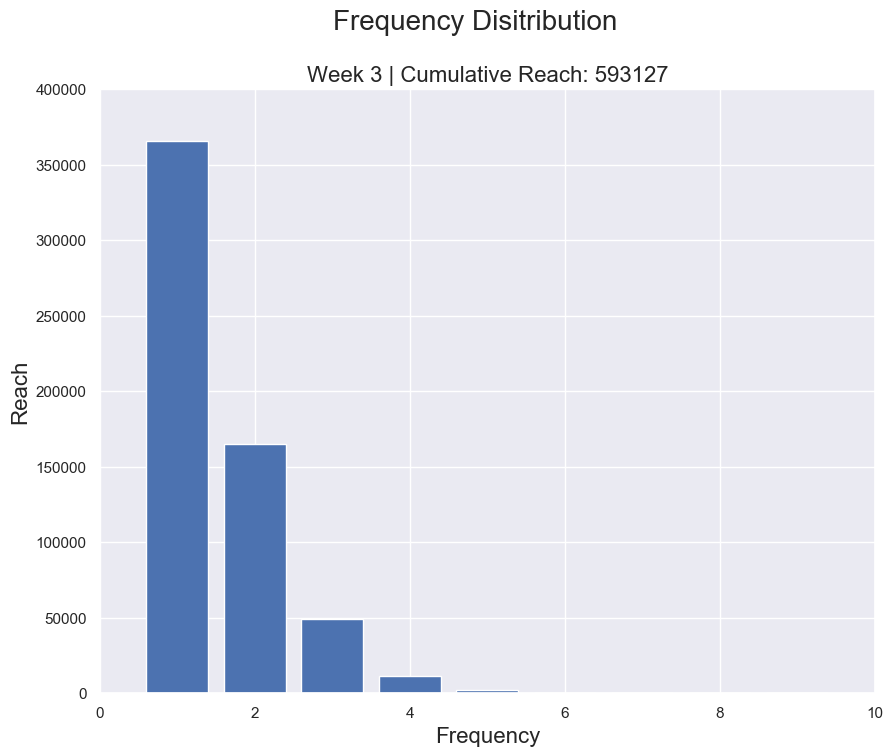

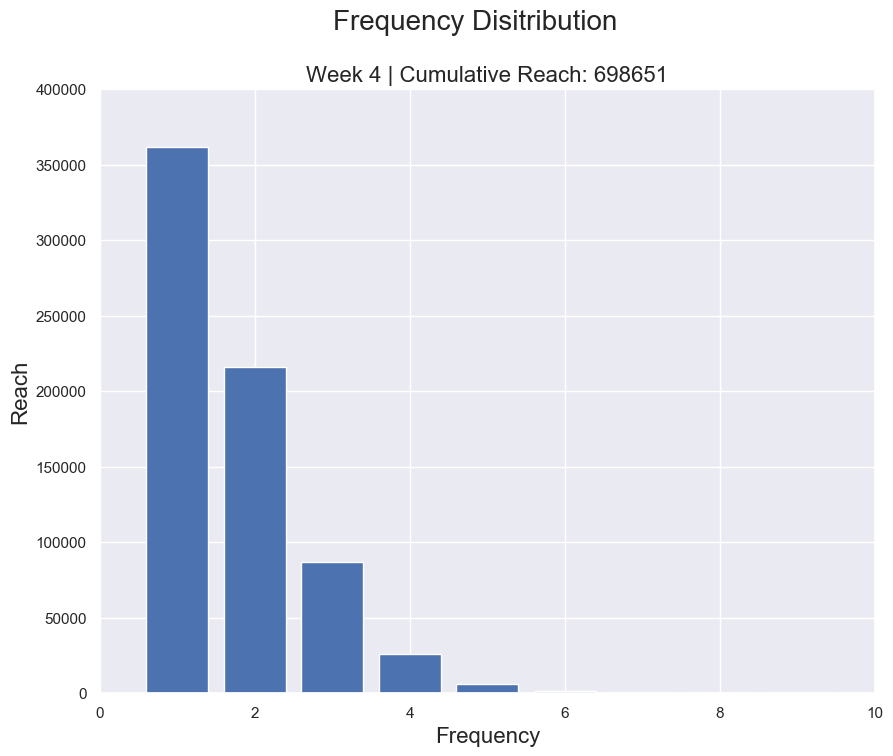

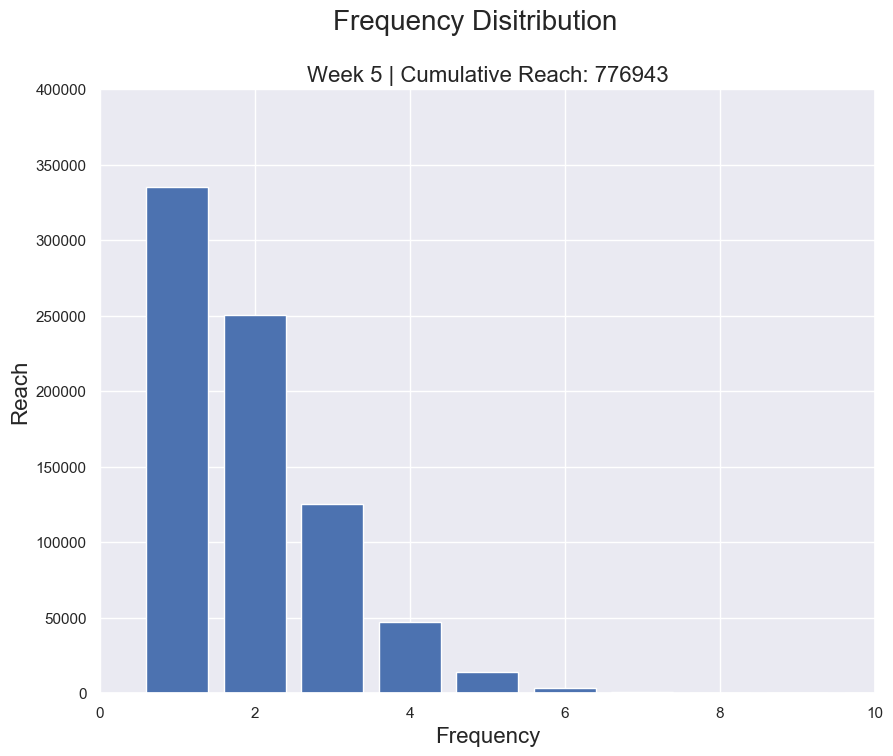

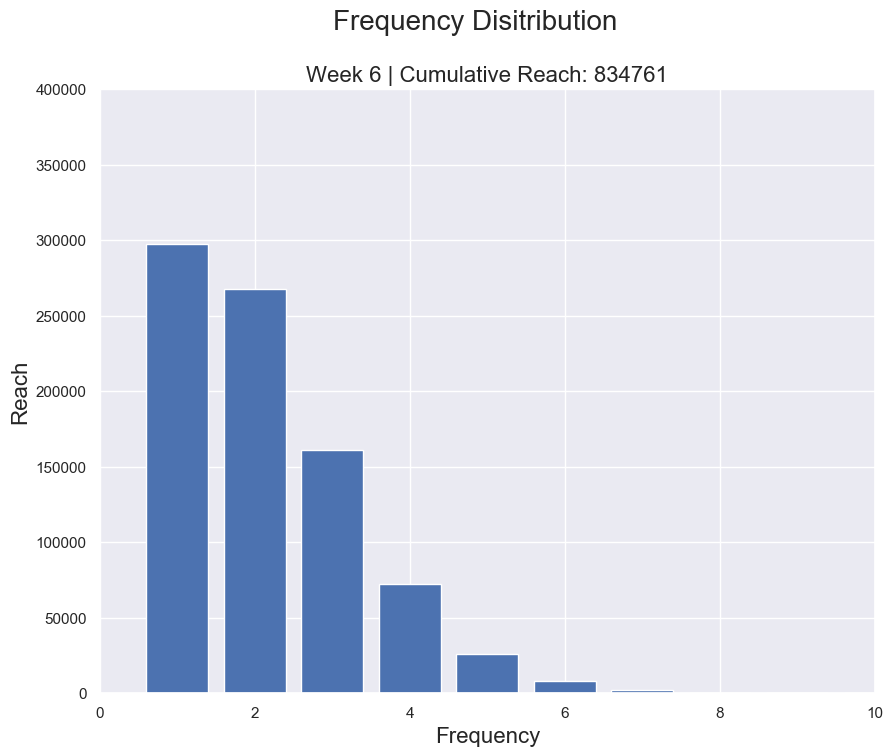

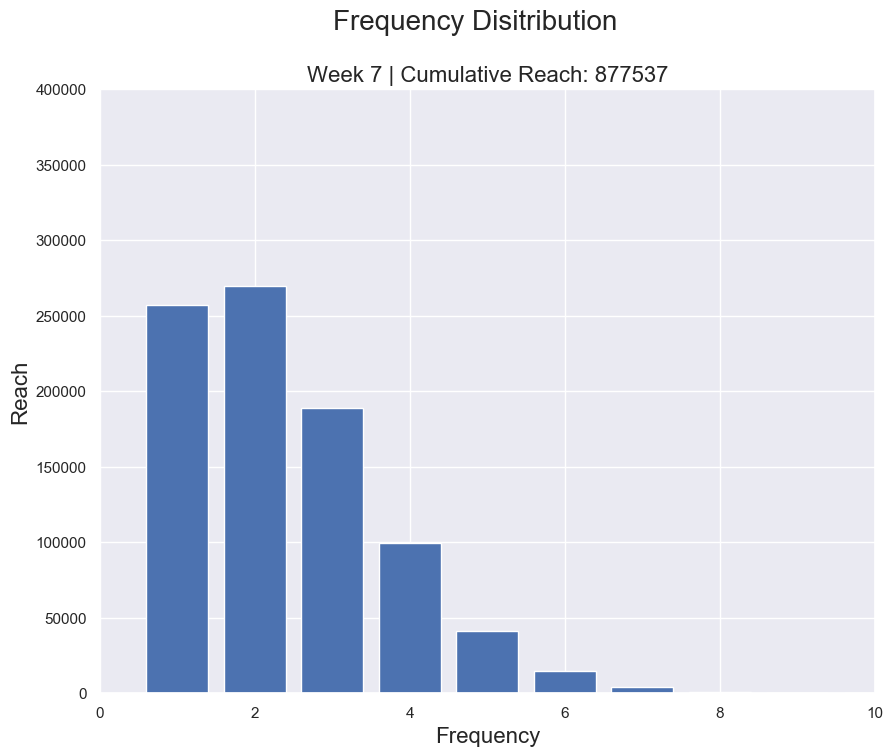

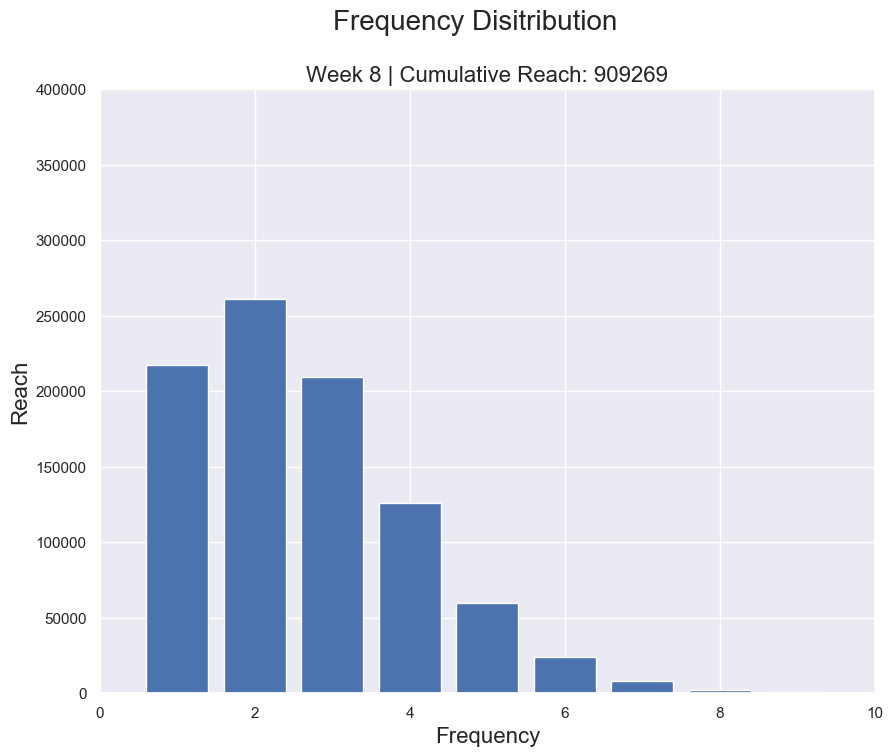

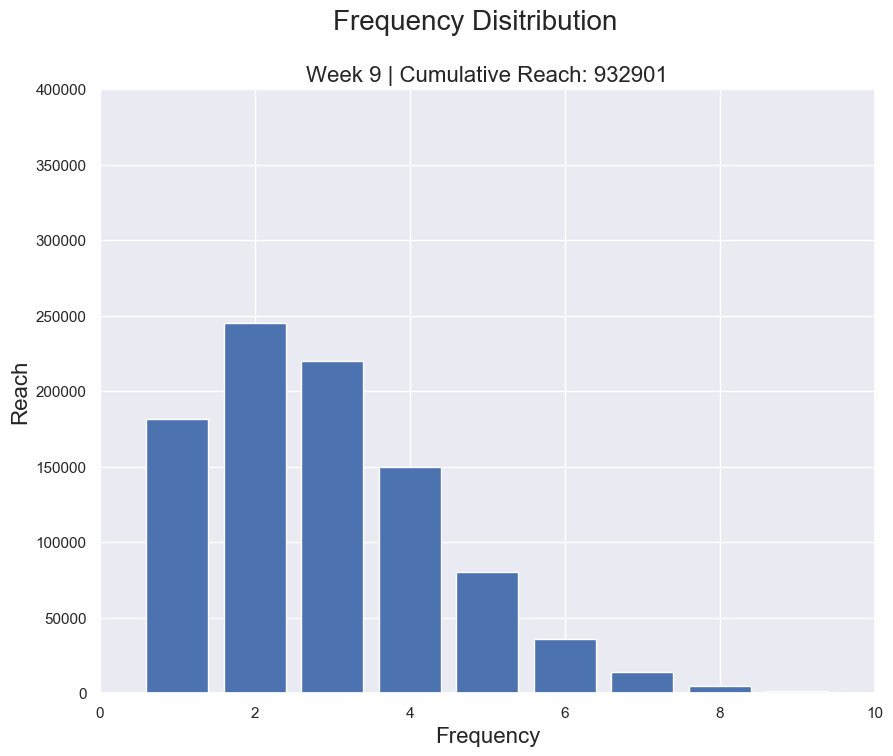

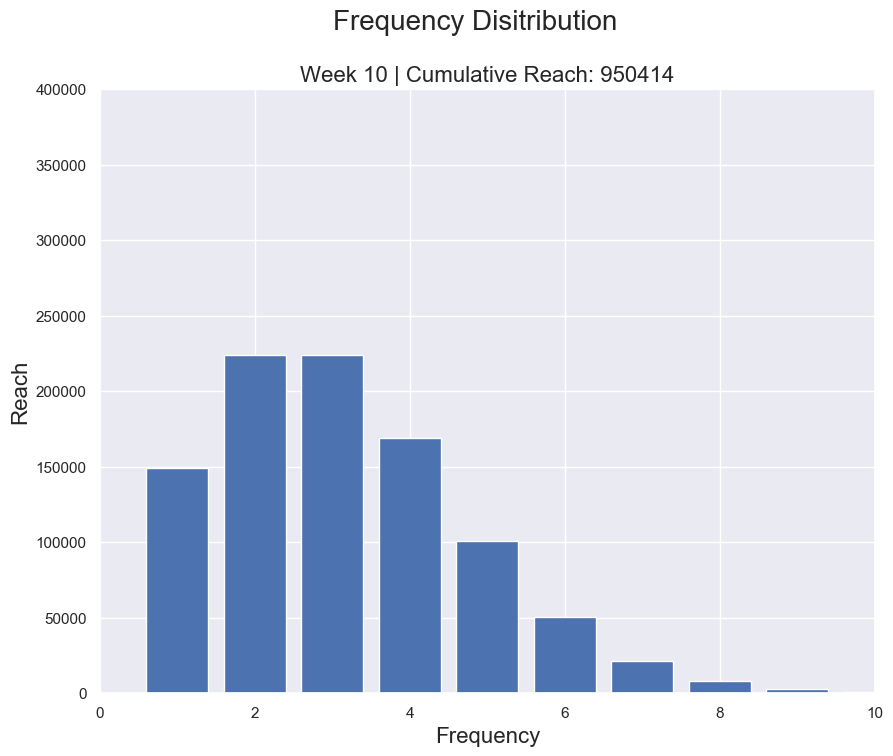

In [6]:
# Plot frequency distribution over time

for idx, (reach, counts) in enumerate(zip(reach_totals, frequency_dists)):
    
    plt.figure(figsize=(10,8), dpi=100)
    plt.bar(
        counts.keys(),
        counts.values(),
    )
    plt.xlim(0, 10)
    plt.ylim(0, 400000)
    plt.suptitle('Frequency Disitribution', fontsize=20)
    plt.title(f'Week {idx+1} | Cumulative Reach: {reach}', fontsize=16)
    plt.xlabel('Frequency', fontsize=16)
    plt.ylabel('Reach', fontsize=16)
    plt.savefig(f'./images/freq_dist_week_{idx+1}', dpi=200, bbox_inches='tight')
    plt.show()